### Analysis

    Observed Trends1:
    According to the latitude vs. temperature plot, as the latitude increases at the northern hemisphere 
    the temperature decrease plummets, when compared to the latitude increase (through negative numbers) 
    at the southern hemisphere. This is most likely related with the percentage of lands at each hemisphere.
    
    Observed Trends2:
    As the two plots of “latitude vs. humidity” and “latitude vs. temperature” evaluated together, 
    the humidity inversely correlates with higher temperature as it is evident that lower latitudes are warmer 
    and have higher humidity.
    
    Observed Trends3:
    As we compare all the plots together (latitude vs. –temperature, -humidity, - cloudiness, -windspeed), 
    we can conclude that latitude effects none of these variables but the temperature. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [3]:
#base_url = "https://openweathermap.org/api"
base_url = "http://api.openweathermap.org/data/2.5/weather?"

df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

print("Beginning Data Retrieval\n"   
"-----------------------------")
     
index=0

cnt=0
for city_name in cities :
    cnt=cnt+1
    #city_name='fairbanks'
    complete_url = base_url + "q=" + city_name + "&appid=" + api_key #+ api_keys.api_key
    print("Processing Record " + str(cnt) + " of Set " + str(len(cities)) + " | " + city_name)
    # get method of requests module 
    # return response object 
    response = requests.get(complete_url) 

    # json method of response object  
    # convert json format data into 
    # python format data 
    x = response.json() 
    #print(x.items())
    
    # Now x contains list of nested dictionaries 
    # Check the value of "cod" key is equal to 
    # "404", means city is found otherwise, 
    # city is not found 
    if x["cod"] != "404": 
        # store the value of "main" 
        # key in variable y 
        y = x["main"] 
        
        df.set_value(index, "City", x["name"])
        df.set_value(index, "Cloudiness", x["clouds"]["all"])
        df.set_value(index, "Country", x["sys"]["country"])
        df.set_value(index, "Date", x["dt"])
        df.set_value(index, "Max Temp", x["main"]["temp_max"])
        df.set_value(index, "Wind Speed", x["wind"]["speed"])
        df.set_value(index, "Lat", x["coord"]["lat"])
        df.set_value(index, "Lng", x["coord"]["lon"])
        df.set_value(index, "Humidity", x["main"]["humidity"])
        index = index +1         
    else:     
        print("City not found. Skipping...")

print("-----------------------------\n"
"Data Retrieval Complete\n"
"-----------------------------")

df.to_csv(output_data_file, index=False)

df.head()


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 637 | new norfolk
Processing Record 2 of Set 637 | vaini


C:\Users\fmsay\Miniconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\fmsay\Miniconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\fmsay\Miniconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\fmsay\Miniconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\fmsay\Miniconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\fmsay\Miniconda3

Processing Record 3 of Set 637 | cape town
Processing Record 4 of Set 637 | umzimvubu
City not found. Skipping...
Processing Record 5 of Set 637 | praxedis guerrero
Processing Record 6 of Set 637 | khatanga
Processing Record 7 of Set 637 | busselton
Processing Record 8 of Set 637 | harbour breton
Processing Record 9 of Set 637 | katsuura
Processing Record 10 of Set 637 | rikitea
Processing Record 11 of Set 637 | deputatskiy
Processing Record 12 of Set 637 | kondopoga
Processing Record 13 of Set 637 | mataura
Processing Record 14 of Set 637 | kavieng
Processing Record 15 of Set 637 | turbat
Processing Record 16 of Set 637 | senador jose porfirio
Processing Record 17 of Set 637 | koulamoutou
Processing Record 18 of Set 637 | athabasca
Processing Record 19 of Set 637 | berlevag
Processing Record 20 of Set 637 | zaragoza
Processing Record 21 of Set 637 | hermanus
Processing Record 22 of Set 637 | biak
Processing Record 23 of Set 637 | qui nhon
City not found. Skipping...
Processing Record 

Processing Record 180 of Set 637 | angra dos reis
Processing Record 181 of Set 637 | naze
Processing Record 182 of Set 637 | vestmannaeyjar
Processing Record 183 of Set 637 | yelan-kolenovskiy
Processing Record 184 of Set 637 | smithers
Processing Record 185 of Set 637 | yellowknife
Processing Record 186 of Set 637 | nuuk
Processing Record 187 of Set 637 | nongstoin
Processing Record 188 of Set 637 | cabra
Processing Record 189 of Set 637 | san patricio
Processing Record 190 of Set 637 | paamiut
Processing Record 191 of Set 637 | monroe
Processing Record 192 of Set 637 | stokmarknes
Processing Record 193 of Set 637 | samusu
City not found. Skipping...
Processing Record 194 of Set 637 | tarko-sale
Processing Record 195 of Set 637 | coron
Processing Record 196 of Set 637 | muisne
Processing Record 197 of Set 637 | conchagua
Processing Record 198 of Set 637 | tumannyy
City not found. Skipping...
Processing Record 199 of Set 637 | ribeira grande
Processing Record 200 of Set 637 | boa vista

Processing Record 353 of Set 637 | ruatoria
City not found. Skipping...
Processing Record 354 of Set 637 | kamaishi
Processing Record 355 of Set 637 | santa marinella
Processing Record 356 of Set 637 | jiddah
City not found. Skipping...
Processing Record 357 of Set 637 | lolua
City not found. Skipping...
Processing Record 358 of Set 637 | cairns
Processing Record 359 of Set 637 | ambulu
Processing Record 360 of Set 637 | virginia beach
Processing Record 361 of Set 637 | namatanai
Processing Record 362 of Set 637 | ryuo
Processing Record 363 of Set 637 | tuatapere
Processing Record 364 of Set 637 | belmonte
Processing Record 365 of Set 637 | llanes
Processing Record 366 of Set 637 | kommunisticheskiy
Processing Record 367 of Set 637 | erenhot
Processing Record 368 of Set 637 | palmer
Processing Record 369 of Set 637 | havelock
Processing Record 370 of Set 637 | northam
Processing Record 371 of Set 637 | tugulym
Processing Record 372 of Set 637 | lipin bor
Processing Record 373 of Set 63

Processing Record 527 of Set 637 | luba
Processing Record 528 of Set 637 | pak phanang
Processing Record 529 of Set 637 | pochutla
Processing Record 530 of Set 637 | victor harbor
Processing Record 531 of Set 637 | nagato
Processing Record 532 of Set 637 | voskresenskoye
Processing Record 533 of Set 637 | ust-tsilma
Processing Record 534 of Set 637 | mezen
Processing Record 535 of Set 637 | seymchan
Processing Record 536 of Set 637 | panguna
Processing Record 537 of Set 637 | port hedland
Processing Record 538 of Set 637 | touros
Processing Record 539 of Set 637 | salym
Processing Record 540 of Set 637 | januaria
City not found. Skipping...
Processing Record 541 of Set 637 | grindavik
Processing Record 542 of Set 637 | salta
Processing Record 543 of Set 637 | horta
Processing Record 544 of Set 637 | cascais
Processing Record 545 of Set 637 | padang
Processing Record 546 of Set 637 | kaeo
Processing Record 547 of Set 637 | atambua
Processing Record 548 of Set 637 | leh
Processing Record

City Cloudiness Country        Date Max Temp Wind Speed  \
0        New Norfolk          0      AU  1544016600   286.15          1   
1              Vaini         75      IN  1544014800   296.15        1.5   
2          Cape Town         88      ZA  1544017801  292.306       4.42   
3  Praxedis Guerrero         40      MX  1544014680   278.15        4.1   
4           Khatanga         88      RU  1544017868  255.206       8.27   

     Lat     Lng Humidity  
0 -42.78  147.06       82  
1  15.34   74.49       94  
2 -33.93   18.42       85  
3  31.37 -106.02       44  
4  71.98  102.47       78

In [4]:
df.count()

City          575
Cloudiness    575
Country       575
Date          575
Max Temp      575
Wind Speed    575
Lat           575
Lng           575
Humidity      575
dtype: int64

#### Latitude vs. Temperature Plot

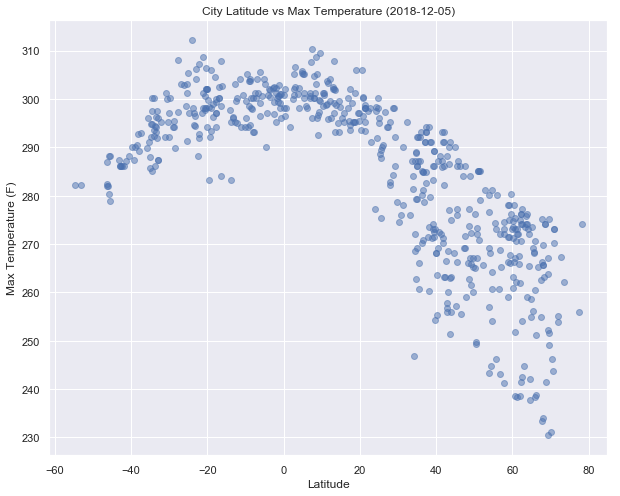

In [6]:
import seaborn as sns
from datetime import datetime
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(df["Lat"], df["Max Temp"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

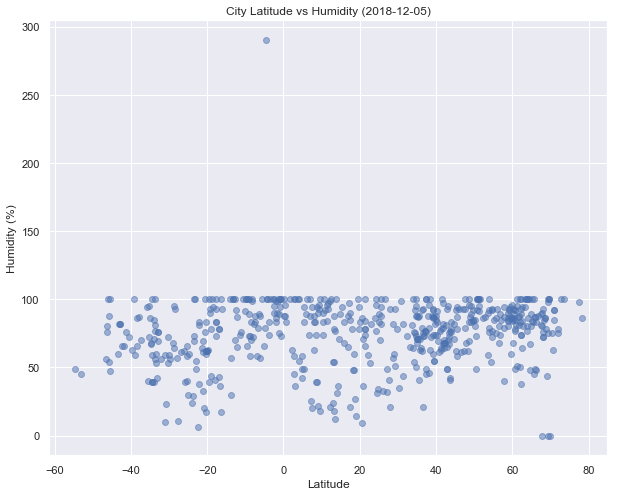

In [10]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(df["Lat"], df["Humidity"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

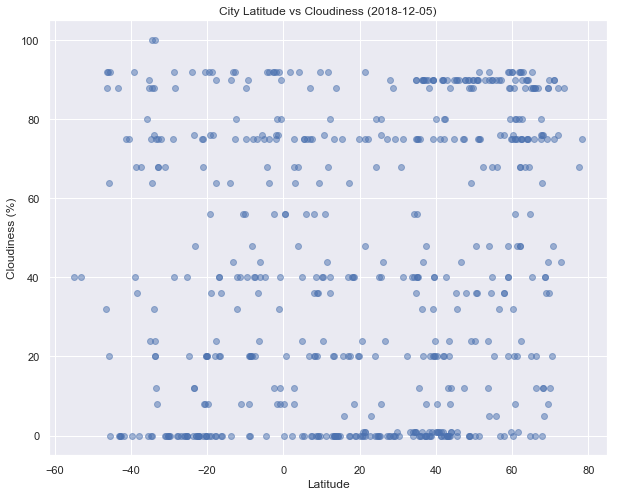

In [14]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(df["Lat"], df["Cloudiness"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

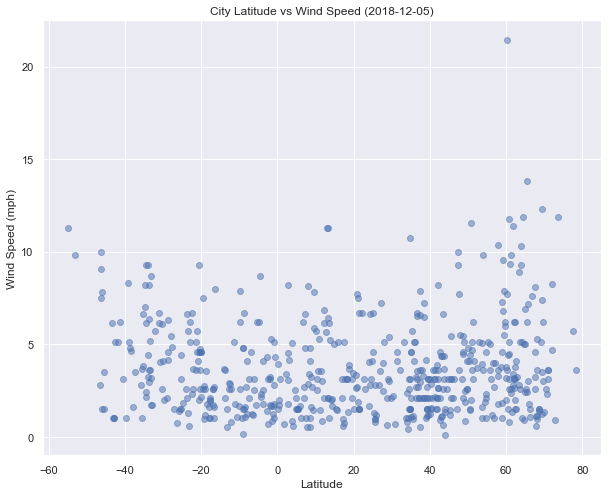

In [16]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(df["Lat"], df["Wind Speed"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWind.png")
plt.show()